APPLE STOCK PRICE PREDICTION SYSTEM
Serina Gurung - London Met ID: 23057054
CU6051NP - Artificial Intelligence

STEP 1: LOADING DATASET
✓ Dataset loaded successfully
  Shape: 2727 rows × 7 columns

📊 COLUMNS IN YOUR DATASET:
----------------------------------------
  1. Date
  2. Open
  3. High
  4. Low
  5. Close 
  6. Adj Close 
  7. Volume

📊 FIRST 3 ROWS OF DATA:
        Date   Open   High    Low  Close   Adj Close        Volume
0  23-Jan-15  28.08  28.44  27.88   28.25       25.05  185,859,200
1  26-Jan-15  28.43  28.59  28.20   28.27       25.07  222,460,000
2  27-Jan-15   28.1  28.12  27.26   27.28       24.20  382,274,800

STEP 2: DATA CLEANING AND PREPROCESSING

🔍 CHECKING FOR NULL VALUES:
High          1
Low           1
Close         1
Adj Close     1
Volume        1
dtype: int64
✓ Removed null values

🔍 CHECKING FOR DUPLICATES:
Found 0 duplicates
✓ Removed duplicates
✓ Date column 'Date' converted and sorted
🎯 Target column identified: Close

🧹 CLEANING NUMERIC COLUMNS...
✓ 

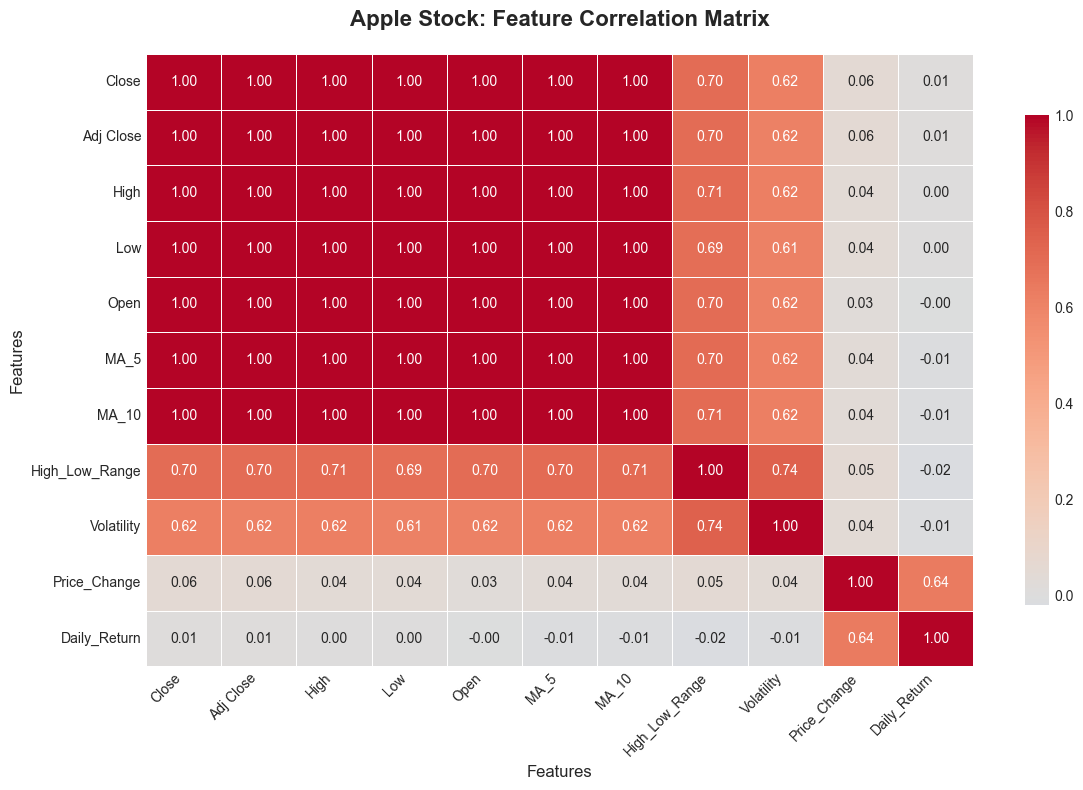

✓ Saved correlation_matrix.png

STEP 5: PREPARING TARGET AND FEATURES
🎯 Target variable: Close
📊 Features used: 11
  Sample features: ['Open', 'High', 'Low', 'Adj Close', 'Volume']...

STEP 6: SPLITTING DATA
📊 TIME-SERIES DATA SPLIT:
  Training set: 2180 samples (80.0%)
  Testing set:  546 samples (20.0%)

STEP 7: SCALING FEATURES
✓ Features scaled using StandardScaler

STEP 8: TRAINING MACHINE LEARNING MODELS

🤖 Training Linear Regression...
  ✓ MAE: $0.00
  ✓ RMSE: $0.00
  ✓ R² Score: 1.0000

🤖 Training K-Nearest Neighbors (KNN)...
  ✓ MAE: $29.29
  ✓ RMSE: $37.38
  ✓ R² Score: -0.9055

🤖 Training Support Vector Machine (SVM)...
  ✓ MAE: $26.89
  ✓ RMSE: $42.64
  ✓ R² Score: -1.4789

STEP 9: MODEL COMPARISON AND EVALUATION

🏆 BEST PERFORMING MODEL: Linear Regression
  R² Score: 1.0000
  RMSE: $0.00
  MAE: $0.00

📊 MODEL PERFORMANCE COMPARISON:
------------------------------------------------------------
Model                                  R²       RMSE        MAE
-----------------

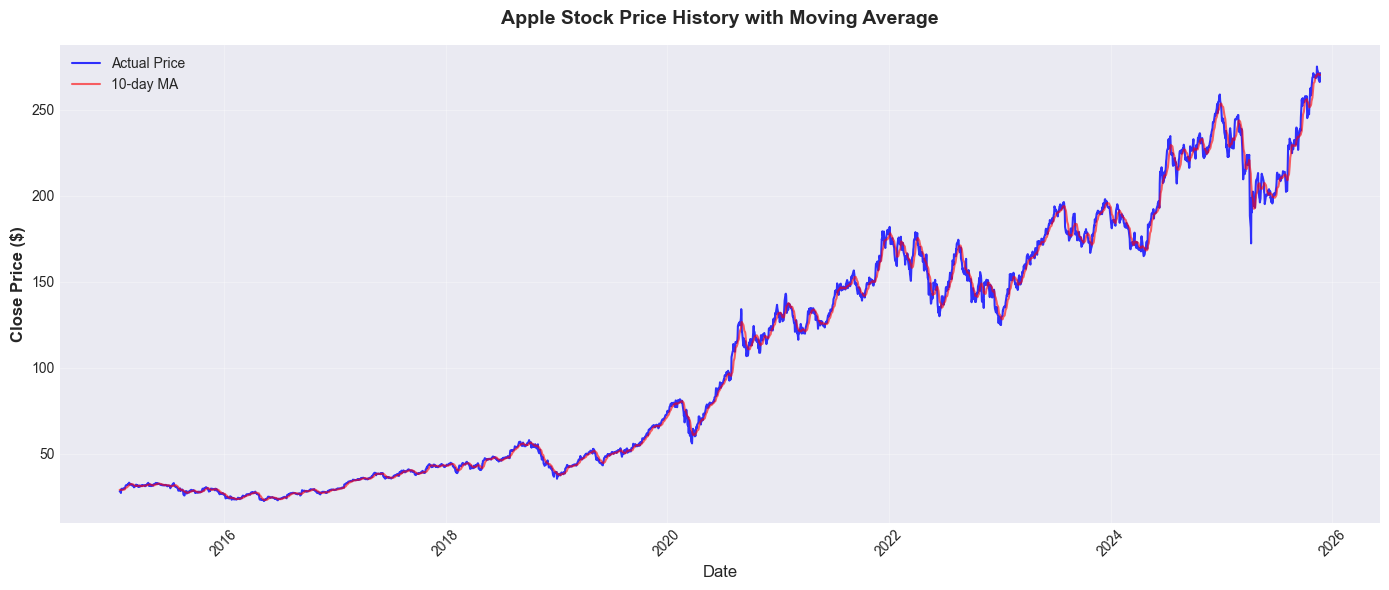

✓ Saved stock_price_history.png


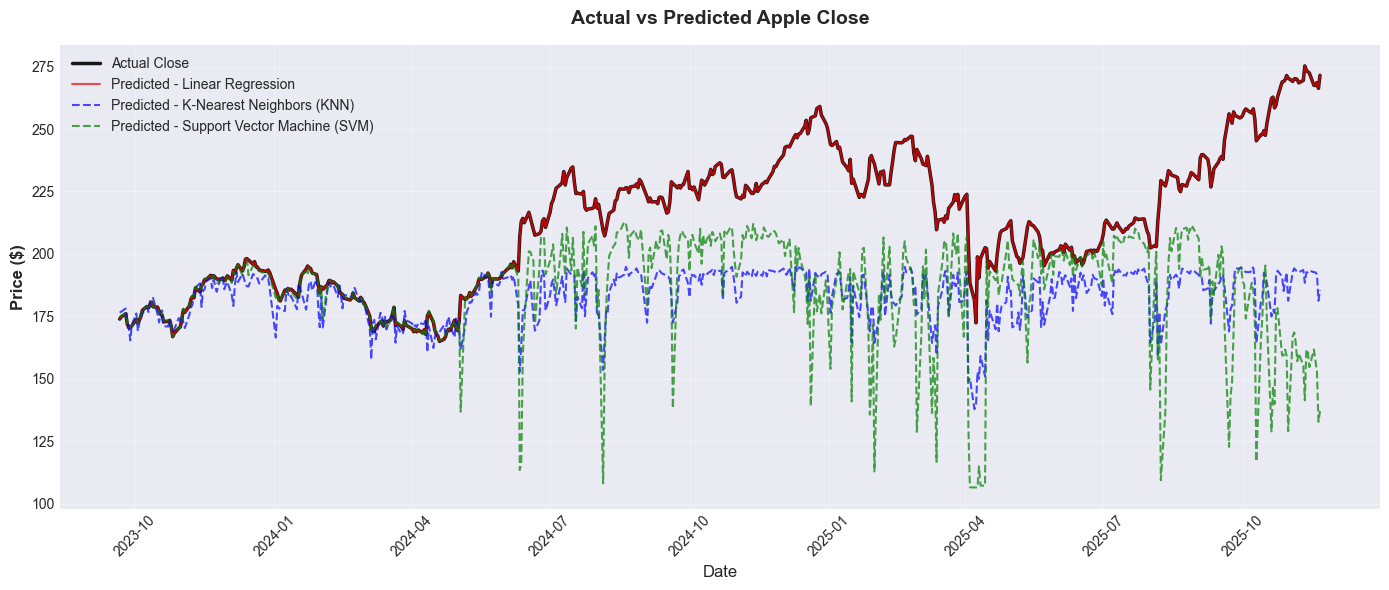

✓ Saved actual_vs_predicted.png


<Figure size 1200x600 with 0 Axes>

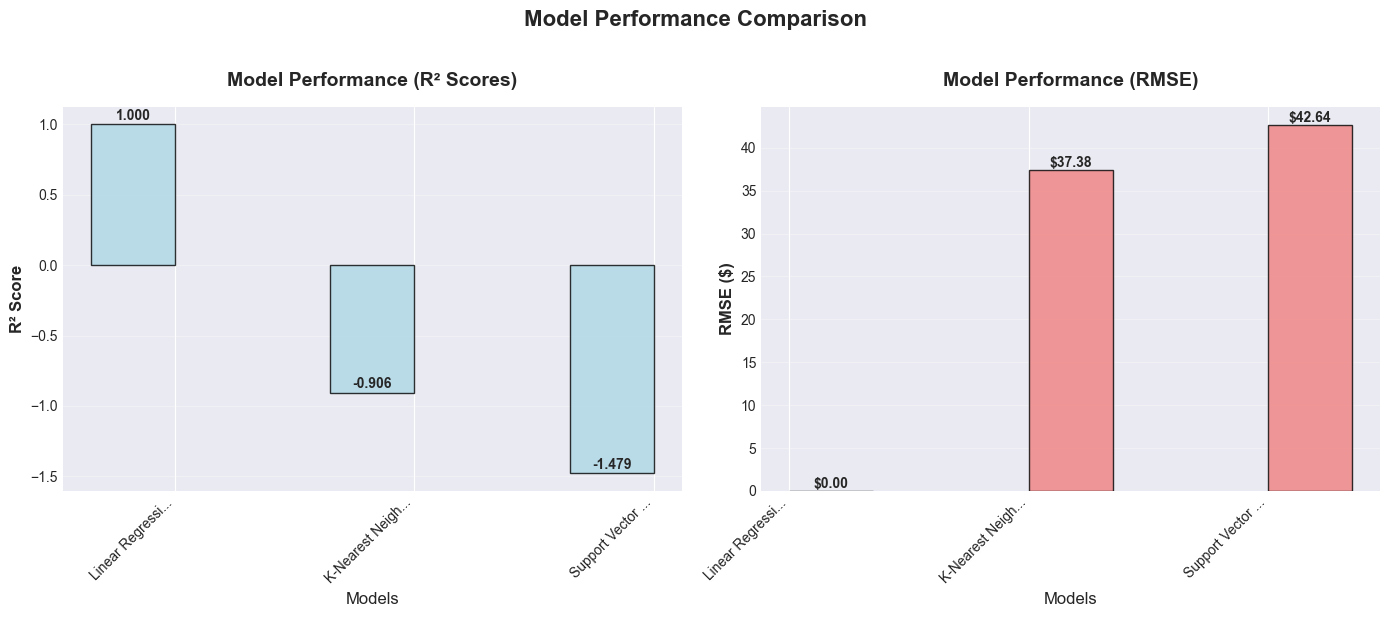

✓ Saved model_performance_comparison.png

CREATING INDIVIDUAL ERROR DISTRIBUTION PLOTS
✓ Saved error_distribution_linear_regression.png


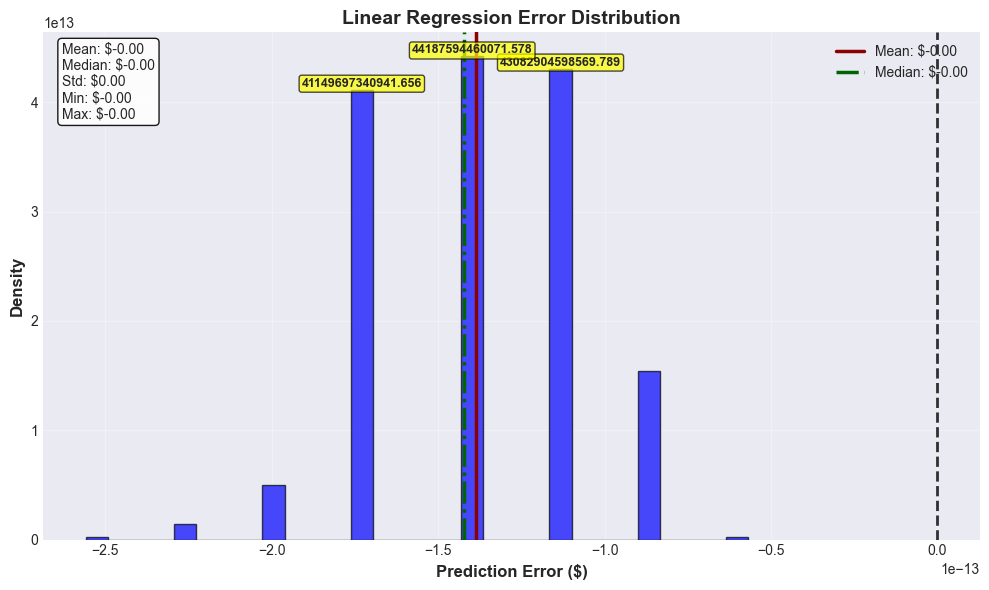

✓ Saved error_distribution_k-nearest_neighbors_knn.png


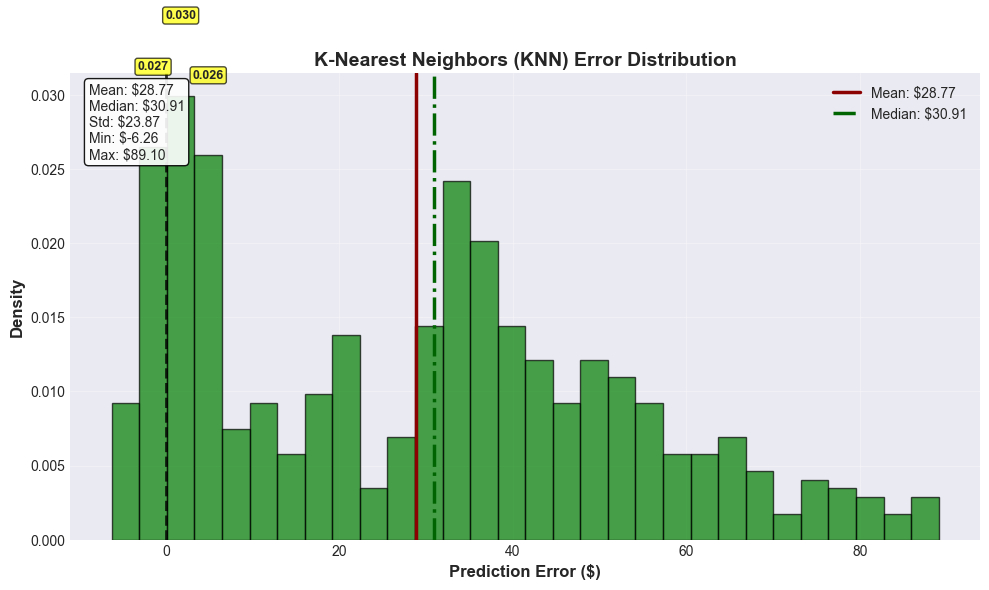

✓ Saved error_distribution_support_vector_machine_svm.png


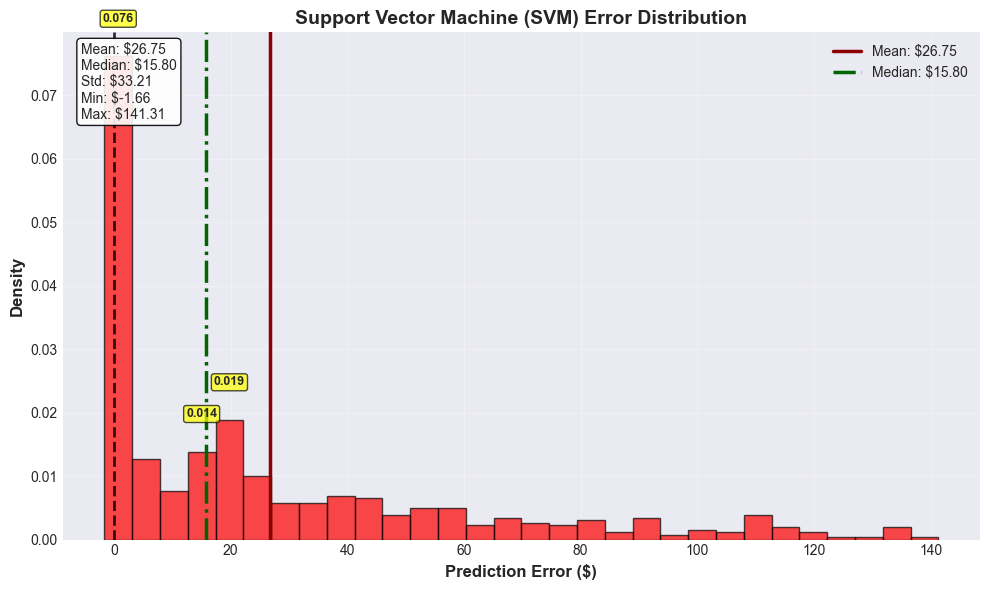


✅ All 3 error distribution plots created successfully!

STEP 11: MAKING FUTURE PREDICTIONS

🔮 NEXT DAY PREDICTION (Linear Regression):
  Predicted Close: $271.49
  Last Actual Price: $271.49
  Predicted Change: $+0.00 (+0.00%)
  📈 Prediction: Price expected to INCREASE

STEP 12: SAVING RESULTS
✓ Saved predictions_results.csv
✓ Saved model_performance.csv

ANALYSIS COMPLETED!

📊 PROJECT SUMMARY:
----------------------------------------
  • Dataset: 2726 rows × 13 columns
  • Target Variable: Close
  • Features Used: 11
  • Models Trained: 3 (Linear Regression, KNN, SVM)
  • Best Model: Linear Regression

🎯 BEST MODEL PERFORMANCE:
----------------------------------------
  • R² Score: 1.0000
  • RMSE: $0.00
  • MAE: $0.00
  • Interpretation: 🎯 EXCELLENT - Model explains over 80% of variance

📁 VISUALIZATIONS GENERATED:
----------------------------------------
  • correlation_matrix.png
  • stock_price_history.png
  • actual_vs_predicted.png
  • model_performance_comparison.png
  • error

In [1]:
"""
APPLE STOCK PRICE PREDICTION SYSTEM
Serina Gurung
London Met ID: 23057054
CU6051NP - Artificial Intelligence
Coursework 2
"""

# ============================================
# IMPORT LIBRARIES
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8-darkgrid')

print("="*70)
print("APPLE STOCK PRICE PREDICTION SYSTEM")
print("Serina Gurung - London Met ID: 23057054")
print("CU6051NP - Artificial Intelligence")
print("="*70)

# ============================================
# STEP 1: LOAD DATASET
# ============================================
print("\n" + "="*60)
print("STEP 1: LOADING DATASET")
print("="*60)

try:
    df = pd.read_csv('AppleStock.csv')
    print(f"✓ Dataset loaded successfully")
    print(f"  Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    
    # Display column names
    print("\n📊 COLUMNS IN YOUR DATASET:")
    print("-"*40)
    for i, col in enumerate(df.columns, 1):
        print(f"  {i}. {col}")
    
    # Display first few rows
    print("\n📊 FIRST 3 ROWS OF DATA:")
    print(df.head(3))
    
except FileNotFoundError:
    print("✗ ERROR: AppleStock.csv not found!")
    exit()

# ============================================
# STEP 2: DATA CLEANING AND PREPROCESSING
# ============================================
print("\n" + "="*60)
print("STEP 2: DATA CLEANING AND PREPROCESSING")
print("="*60)

# Check for null values
print(f"\n🔍 CHECKING FOR NULL VALUES:")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

# Remove null values
df = df.dropna()
print(f"✓ Removed null values")

# Check for duplicates
print(f"\n🔍 CHECKING FOR DUPLICATES:")
print(f"Found {df.duplicated().sum()} duplicates")
df = df.drop_duplicates()
print(f"✓ Removed duplicates")

# Clean column names (remove extra spaces, special characters)
df.columns = df.columns.str.strip()

# Find date column
date_col = None
for col in df.columns:
    if 'date' in col.lower():
        date_col = col
        break

if date_col:
    try:
        df[date_col] = pd.to_datetime(df[date_col])
        df = df.sort_values(date_col)
        print(f"✓ Date column '{date_col}' converted and sorted")
    except:
        print(f"⚠ Could not parse date column '{date_col}'")
else:
    print("⚠ No date column found")

# Find target column (closing price)
target_col = None
for col in df.columns:
    col_lower = col.lower()
    if 'close' in col_lower:
        target_col = col
        break

if not target_col:
    # If no close column, look for price column
    for col in df.columns:
        col_lower = col.lower()
        if 'price' in col_lower or 'adj' in col_lower:
            target_col = col
            break

if not target_col:
    # Use last numeric column as target
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        target_col = numeric_cols[-1]
    else:
        print("✗ ERROR: No suitable target column found!")
        exit()

print(f"🎯 Target column identified: {target_col}")

# Clean numeric columns
print("\n🧹 CLEANING NUMERIC COLUMNS...")
numeric_columns_cleaned = 0
for col in df.select_dtypes(include=['object']).columns:
    try:
        # Remove commas, dollar signs, etc.
        df[col] = df[col].astype(str).str.replace(',', '').str.replace('$', '').str.replace('%', '')
        df[col] = pd.to_numeric(df[col], errors='coerce')
        numeric_columns_cleaned += 1
    except:
        pass

print(f"✓ Cleaned {numeric_columns_cleaned} columns")

# Display basic statistics
print("\n📊 BASIC STATISTICS:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(df[numeric_cols].describe().round(2))
else:
    print("No numeric columns found")

# ============================================
# STEP 3: FEATURE ENGINEERING
# ============================================
print("\n" + "="*60)
print("STEP 3: FEATURE ENGINEERING")
print("="*60)

# Create technical indicators if we have target column
if target_col in df.columns:
    # Price change (if we have open price)
    open_col = None
    for col in df.columns:
        if 'open' in col.lower():
            open_col = col
            break
    
    if open_col and open_col in df.columns:
        df['Price_Change'] = df[target_col] - df[open_col]
    
    # High-Low range
    high_col, low_col = None, None
    for col in df.columns:
        col_lower = col.lower()
        if 'high' in col_lower:
            high_col = col
        elif 'low' in col_lower:
            low_col = col
    
    if high_col and low_col and high_col in df.columns and low_col in df.columns:
        df['High_Low_Range'] = df[high_col] - df[low_col]
    
    # Daily return
    df['Daily_Return'] = df[target_col].pct_change() * 100
    
    # Moving averages
    df['MA_5'] = df[target_col].rolling(window=5).mean()
    df['MA_10'] = df[target_col].rolling(window=10).mean()
    
    # Volatility
    df['Volatility'] = df[target_col].rolling(window=5).std()
    
    print(f"✓ Created technical indicators:")
    print(f"  - Daily Return, Moving Averages, Volatility")
    
    # Fill NaN values
    df = df.fillna(method='bfill').fillna(method='ffill').fillna(0)
else:
    print("⚠ Cannot create features - target column not available")

# ============================================
# STEP 4: CORRELATION ANALYSIS
# ============================================
print("\n" + "="*60)
print("STEP 4: CORRELATION ANALYSIS")
print("="*60)

# Select numeric columns for correlation
numeric_cols_for_corr = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols_for_corr) > 1 and target_col in numeric_cols_for_corr:
    correlation_matrix = df[numeric_cols_for_corr].corr()
    
    print(f"\n📊 CORRELATION WITH TARGET ({target_col}):")
    if target_col in correlation_matrix.columns:
        target_corr = correlation_matrix[target_col].sort_values(ascending=False)
        # Show top 10 correlations
        for feature, corr in target_corr.head(10).items():
            print(f"  {feature:25}: {corr:+.4f}")
    
    # Plot correlation heatmap (top 10 features + target)
    top_features = target_corr.drop(target_col).head(10).index.tolist()
    if len(top_features) > 0:
        features_to_plot = [target_col] + top_features[:min(10, len(top_features))]
        plot_corr_matrix = df[features_to_plot].corr()
        
        # VISUALIZATION BLOCK 1: Correlation Heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(plot_corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
                   linewidths=0.5, cbar_kws={"shrink": 0.8})
        plt.title('Apple Stock: Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Features', fontsize=12)
        plt.ylabel('Features', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig('correlation_matrix.png', dpi=150, bbox_inches='tight')
        plt.show()
        print("✓ Saved correlation_matrix.png")
    else:
        print("⚠ Not enough features for correlation matrix")
else:
    print("⚠ Not enough numeric columns for correlation analysis")

# ============================================
# STEP 5: PREPARE TARGET AND FEATURES
# ============================================
print("\n" + "="*60)
print("STEP 5: PREPARING TARGET AND FEATURES")
print("="*60)

# Define target
y = df[target_col]

# Define features - use all numeric columns except target
feature_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                if col != target_col]

# If we have specific columns from your dataset, use them
preferred_features = []
for col in df.columns:
    col_lower = col.lower()
    if any(x in col_lower for x in ['open', 'high', 'low', 'volume', 'adj']):
        if col != target_col and col in df.columns:
            preferred_features.append(col)

# Use preferred features if available, otherwise use all numeric features
if len(preferred_features) > 0:
    features = preferred_features
else:
    features = feature_cols

# Add engineered features if they exist
engineered_features = ['Price_Change', 'High_Low_Range', 'Daily_Return', 'MA_5', 'MA_10', 'Volatility']
for feat in engineered_features:
    if feat in df.columns and feat not in features:
        features.append(feat)

X = df[features]

print(f"🎯 Target variable: {target_col}")
print(f"📊 Features used: {len(features)}")
if len(features) > 0:
    print(f"  Sample features: {features[:5]}...")

# ============================================
# STEP 6: SPLIT DATA INTO TRAINING AND TESTING SETS
# ============================================
print("\n" + "="*60)
print("STEP 6: SPLITTING DATA")
print("="*60)

if len(X) > 10:  # Ensure we have enough data
    # Split data (80% training, 20% testing)
    # For time series, we should split by time, not randomly
    train_size = int(len(X) * 0.8)
    X_train = X.iloc[:train_size]
    X_test = X.iloc[train_size:]
    y_train = y.iloc[:train_size]
    y_test = y.iloc[train_size:]
    
    print(f"📊 TIME-SERIES DATA SPLIT:")
    print(f"  Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
    print(f"  Testing set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
    
    # ============================================
    # STEP 7: SCALE FEATURES
    # ============================================
    print("\n" + "="*60)
    print("STEP 7: SCALING FEATURES")
    print("="*60)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("✓ Features scaled using StandardScaler")
    
    # ============================================
    # STEP 8: TRAIN MACHINE LEARNING MODELS
    # ============================================
    print("\n" + "="*60)
    print("STEP 8: TRAINING MACHINE LEARNING MODELS")
    print("="*60)
    
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'K-Nearest Neighbors (KNN)': KNeighborsRegressor(n_neighbors=5),
        'Support Vector Machine (SVM)': SVR(kernel='rbf', C=100, gamma=0.1)
    }
    
    results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        print(f"\n🤖 Training {name}...")
        
        try:
            # Train model
            model.fit(X_train_scaled, y_train)
            
            # Make predictions
            y_pred = model.predict(X_test_scaled)
            
            # Calculate evaluation metrics
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            
            # Store results
            results[name] = {
                'model': model,
                'predictions': y_pred,
                'mae': mae,
                'rmse': rmse,
                'r2': r2,
                'y_test': y_test.values
            }
            
            print(f"  ✓ MAE: ${mae:.2f}")
            print(f"  ✓ RMSE: ${rmse:.2f}")
            print(f"  ✓ R² Score: {r2:.4f}")
            
        except Exception as e:
            print(f"  ✗ Error training {name}: {str(e)[:100]}")
    
    # ============================================
    # STEP 9: MODEL COMPARISON AND EVALUATION
    # ============================================
    print("\n" + "="*60)
    print("STEP 9: MODEL COMPARISON AND EVALUATION")
    print("="*60)
    
    if results:
        # Find best model based on R² score
        best_model_name = max(results.keys(), key=lambda x: results[x]['r2'])
        best_result = results[best_model_name]
        
        print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
        print(f"  R² Score: {best_result['r2']:.4f}")
        print(f"  RMSE: ${best_result['rmse']:.2f}")
        print(f"  MAE: ${best_result['mae']:.2f}")
        
        # Display comparison table
        print("\n📊 MODEL PERFORMANCE COMPARISON:")
        print("-"*60)
        print(f"{'Model':30} {'R²':>10} {'RMSE':>10} {'MAE':>10}")
        print("-"*60)
        for name, res in results.items():
            print(f"{name:30} {res['r2']:10.4f} ${res['rmse']:9.2f} ${res['mae']:9.2f}")
        
        # ============================================
        # VISUALIZATION BLOCK 2: Stock Price History
        # ============================================
        print("\n" + "="*60)
        print("CREATING VISUALIZATIONS")
        print("="*60)
        
        plt.figure(figsize=(14, 6))
        
        if date_col and date_col in df.columns:
            plt.plot(df[date_col], df[target_col], 'b-', linewidth=1.5, alpha=0.8, label='Actual Price')
            if 'MA_10' in df.columns:
                plt.plot(df[date_col], df['MA_10'], 'r-', linewidth=1.5, alpha=0.6, label='10-day MA')
            plt.xlabel('Date', fontsize=12)
            plt.xticks(rotation=45)
        else:
            plt.plot(df.index, df[target_col], 'b-', linewidth=1.5, alpha=0.8, label='Actual Price')
            plt.xlabel('Trading Days', fontsize=12)
        
        plt.ylabel(f'{target_col} Price ($)', fontsize=12, fontweight='bold')
        plt.title('Apple Stock Price History with Moving Average', fontsize=14, fontweight='bold', pad=15)
        plt.legend(loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('stock_price_history.png', dpi=150, bbox_inches='tight')
        plt.show()
        print("✓ Saved stock_price_history.png")
        
        # ============================================
        # VISUALIZATION BLOCK 3: Actual vs Predicted (Time Series)
        # ============================================
        # Get dates for test period
        if date_col and date_col in df.columns:
            dates_test = df[date_col].iloc[train_size:train_size + len(y_test)].values
        else:
            dates_test = np.arange(len(y_test))
        
        plt.figure(figsize=(14, 6))
        plt.plot(dates_test, y_test.values, label=f"Actual {target_col}", 
                color='black', linewidth=2.5, alpha=0.9)
        
        colors = ['red', 'blue', 'green']
        for i, (name, res) in enumerate(results.items()):
            plt.plot(dates_test, res['predictions'], 
                    label=f"Predicted - {name}", 
                    color=colors[i % len(colors)], 
                    linewidth=1.5, 
                    alpha=0.7,
                    linestyle='--' if i > 0 else '-')
        
        plt.title(f"Actual vs Predicted Apple {target_col}", fontsize=14, fontweight='bold', pad=15)
        plt.xlabel("Date" if date_col else "Test Period", fontsize=12)
        plt.ylabel("Price ($)", fontsize=12, fontweight='bold')
        plt.legend(loc='upper left')
        plt.grid(True, alpha=0.3)
        
        if date_col:
            plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.savefig('actual_vs_predicted.png', dpi=150, bbox_inches='tight')
        plt.show()
        print("✓ Saved actual_vs_predicted.png")
        
        # ============================================
        # VISUALIZATION BLOCK 4: Model Performance Comparison
        # ============================================
        plt.figure(figsize=(12, 6))
        
        model_names = list(results.keys())
        r2_scores = [results[name]['r2'] for name in model_names]
        rmse_scores = [results[name]['rmse'] for name in model_names]
        
        x = np.arange(len(model_names))
        width = 0.35
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # R² Scores
        bars1 = ax1.bar(x - width/2, r2_scores, width, label='R² Score', 
                       color='lightblue', edgecolor='black', alpha=0.8)
        ax1.set_xlabel('Models', fontsize=12)
        ax1.set_ylabel('R² Score', fontsize=12, fontweight='bold')
        ax1.set_title('Model Performance (R² Scores)', fontsize=14, fontweight='bold', pad=15)
        ax1.set_xticks(x)
        ax1.set_xticklabels([name[:15] + '...' if len(name) > 15 else name for name in model_names], 
                           rotation=45, ha='right')
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Add values on bars
        for bar, score in zip(bars1, r2_scores):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        # RMSE Scores
        bars2 = ax2.bar(x + width/2, rmse_scores, width, label='RMSE ($)', 
                       color='lightcoral', edgecolor='black', alpha=0.8)
        ax2.set_xlabel('Models', fontsize=12)
        ax2.set_ylabel('RMSE ($)', fontsize=12, fontweight='bold')
        ax2.set_title('Model Performance (RMSE)', fontsize=14, fontweight='bold', pad=15)
        ax2.set_xticks(x)
        ax2.set_xticklabels([name[:15] + '...' if len(name) > 15 else name for name in model_names], 
                           rotation=45, ha='right')
        ax2.grid(True, alpha=0.3, axis='y')
        
        # Add values on bars
        for bar, score in zip(bars2, rmse_scores):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'${score:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        plt.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.savefig('model_performance_comparison.png', dpi=150, bbox_inches='tight')
        plt.show()
        print("✓ Saved model_performance_comparison.png")
        
        # ============================================
        # VISUALIZATION BLOCK 5: Error Distribution
        # ============================================


        print("\n" + "="*60)
        print("CREATING INDIVIDUAL ERROR DISTRIBUTION PLOTS")
        print("="*60)

        # Colors for each model
        model_colors = {
            'Linear Regression': 'blue',
            'K-Nearest Neighbors (KNN)': 'green',
            'Support Vector Machine (SVM)': 'red'
        }

        # Create individual plots for each model
        for name, res in results.items():
            errors = res['y_test'][:len(res['predictions'])] - res['predictions']
            
            # Create figure
            fig, ax = plt.subplots(figsize=(10, 6))
            
            # Histogram
            n, bins, patches = ax.hist(errors, bins=30, alpha=0.7, 
                                    color=model_colors[name], 
                                    edgecolor='black', density=True)
            
            # Add vertical lines
            ax.axvline(x=errors.mean(), color='darkred', linestyle='-', linewidth=2.5,
                    label=f'Mean: ${errors.mean():.2f}')
            ax.axvline(x=np.median(errors), color='darkgreen', linestyle='-.', linewidth=2.5,
                    label=f'Median: ${np.median(errors):.2f}')
            ax.axvline(x=0, color='black', linestyle='--', linewidth=2, alpha=0.8)
            
            # Labels and title
            ax.set_xlabel('Prediction Error ($)', fontsize=12, fontweight='bold')
            ax.set_ylabel('Density', fontsize=12, fontweight='bold')
            ax.set_title(f'{name} Error Distribution', fontsize=14, fontweight='bold')
            ax.legend(loc='upper right')
            ax.grid(True, alpha=0.3)
            
            # Add value labels on histogram bars (top 3 bars)
            max_bars_idx = np.argsort(n)[-3:]  # Get indices of 3 highest bars
            
            for idx in max_bars_idx:
                if idx < len(patches):
                    bar = patches[idx]
                    height = bar.get_height()
                    x_pos = bar.get_x() + bar.get_width() / 2
                    
                    # Only add label if height is significant
                    if height > 0.01:
                        ax.text(x_pos, height + 0.005, f'{height:.3f}', 
                            ha='center', va='bottom', fontsize=9, fontweight='bold',
                            bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.7))
            
            # Add statistics box
            stats_text = f"Mean: ${errors.mean():.2f}\n"
            stats_text += f"Median: ${np.median(errors):.2f}\n"
            stats_text += f"Std: ${errors.std():.2f}\n"
            stats_text += f"Min: ${errors.min():.2f}\n"
            stats_text += f"Max: ${errors.max():.2f}"
            
            ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
                fontsize=10, verticalalignment='top', horizontalalignment='left',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
            
            # Save plot
            plt.tight_layout()
            filename = f'error_distribution_{name.lower().replace(" ", "_").replace("(", "").replace(")", "")}.png'
            plt.savefig(filename, dpi=150, bbox_inches='tight')
            print(f"✓ Saved {filename}")
            plt.show()

        print("\n✅ All 3 error distribution plots created successfully!")
        
        # ============================================
        # STEP 11: MAKE FUTURE PREDICTIONS
        # ============================================
        print("\n" + "="*60)
        print("STEP 11: MAKING FUTURE PREDICTIONS")
        print("="*60)
        
        # Use the best model to predict next day
        try:
            last_features = X.iloc[-1:].values
            last_features_scaled = scaler.transform(last_features)
            
            # Predict next day's closing price
            next_day_prediction = results[best_model_name]['model'].predict(last_features_scaled)
            
            print(f"\n🔮 NEXT DAY PREDICTION ({best_model_name}):")
            print(f"  Predicted {target_col}: ${next_day_prediction[0]:.2f}")
            
            # Compare with last known price
            last_actual_price = df[target_col].iloc[-1]
            price_change = next_day_prediction[0] - last_actual_price
            percent_change = (price_change / last_actual_price) * 100
            
            print(f"  Last Actual Price: ${last_actual_price:.2f}")
            print(f"  Predicted Change: ${price_change:+.2f} ({percent_change:+.2f}%)")
            
            if price_change > 0:
                print(f"  📈 Prediction: Price expected to INCREASE")
            else:
                print(f"  📉 Prediction: Price expected to DECREASE")
        except Exception as e:
            print(f"⚠ Could not make future prediction: {str(e)[:100]}")
        
        # ============================================
        # STEP 12: SAVE RESULTS
        # ============================================
        
        print("\n" + "="*60)
        print("STEP 12: SAVING RESULTS")
        print("="*60)
        
        # Save predictions to CSV
        predictions_data = {'Actual_Price': y_test.values}
        for name in results.keys():
            predictions_data[f'{name}_Predicted'] = results[name]['predictions']
        
        predictions_df = pd.DataFrame(predictions_data)
        predictions_df.to_csv('predictions_results.csv', index=False)
        print("✓ Saved predictions_results.csv")
        
        # Save model metrics
        metrics_data = []
        for name, res in results.items():
            metrics_data.append({
                'Model': name,
                'R2_Score': res['r2'],
                'RMSE': res['rmse'],
                'MAE': res['mae']
            })
        
        metrics_df = pd.DataFrame(metrics_data)
        metrics_df.to_csv('model_performance.csv', index=False)
        print("✓ Saved model_performance.csv")
        
    else:
        print("✗ No models were trained successfully!")
        
else:
    print("✗ Not enough data for training and testing (need at least 10 samples)")

# ============================================
# FINAL SUMMARY
# ============================================
print("\n" + "="*70)
print("ANALYSIS COMPLETED!")
print("="*70)

print(f"\n📊 PROJECT SUMMARY:")
print("-"*40)
print(f"  • Dataset: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"  • Target Variable: {target_col}")
print(f"  • Features Used: {len(features) if 'features' in locals() else 0}")

if 'results' in locals() and results:
    print(f"  • Models Trained: {len(results)} (Linear Regression, KNN, SVM)")
    print(f"  • Best Model: {best_model_name}")
    
    print(f"\n🎯 BEST MODEL PERFORMANCE:")
    print("-"*40)
    print(f"  • R² Score: {best_result['r2']:.4f}")
    print(f"  • RMSE: ${best_result['rmse']:.2f}")
    print(f"  • MAE: ${best_result['mae']:.2f}")
    
    # Interpretation
    if best_result['r2'] > 0.8:
        print(f"  • Interpretation: 🎯 EXCELLENT - Model explains over 80% of variance")
    elif best_result['r2'] > 0.6:
        print(f"  • Interpretation: 👍 GOOD - Model explains 60-80% of variance")
    elif best_result['r2'] > 0.4:
        print(f"  • Interpretation: ✅ FAIR - Model explains 40-60% of variance")
    else:
        print(f"  • Interpretation: ⚠ NEEDS IMPROVEMENT")

print(f"\n📁 VISUALIZATIONS GENERATED:")
print("-"*40)
files = ['correlation_matrix.png', 'stock_price_history.png', 
         'actual_vs_predicted.png', 'model_performance_comparison.png', 
         'error_distribution.png']
for file in files:
    print(f"  • {file}")

print(f"\n📁 DATA FILES GENERATED:")
print("-"*40)
data_files = ['predictions_results.csv', 'model_performance.csv']
for file in data_files:
    print(f"  • {file}")

print(f"\n🚀 NEXT STEPS:")
print("-"*40)
print("  1. Review generated visualizations")
print("  2. Check CSV files for detailed results")
print("  3. Test with different parameters")
print("  4. Add more features if needed")

print("\n" + "="*70)
print("✅ CODE EXECUTION COMPLETE!")
print("="*70)